# Titanic Survival Prediction

## Importing the dependencies

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Collection and Analysis

In [11]:
titanic_data = pd.read_csv('train.csv')

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_data.shape

(891, 12)

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing Values

In [16]:
# Dropping the 'Cabin' column from the dataframe
titanic_data.drop(columns=['Cabin'], inplace=True)

In [19]:
# Filling the missing values of 'Age' with its the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [23]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [24]:
titanic_data['Embarked'].mode()[0]

'S'

In [25]:
# Filling the missing values of 'Embarked' column with its mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [26]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Visualization

In [28]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
sns.set()

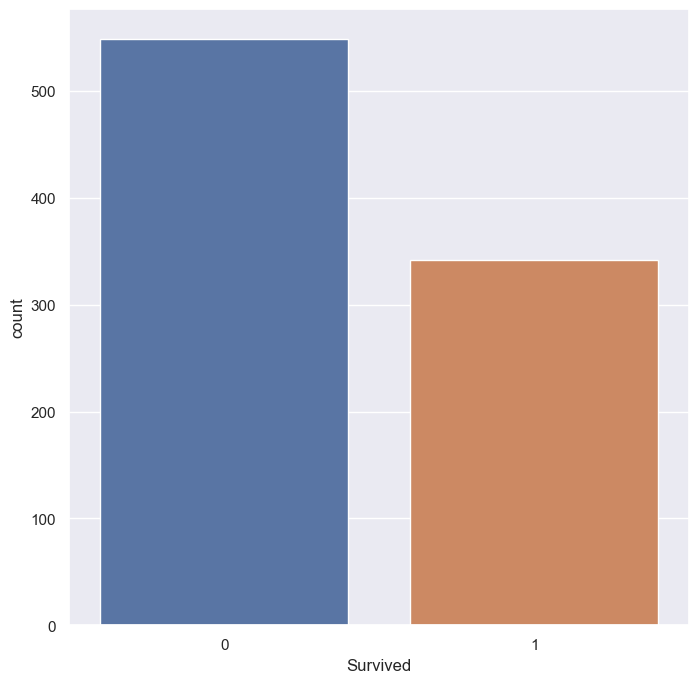

In [30]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Survived', data=titanic_data)
plt.show()

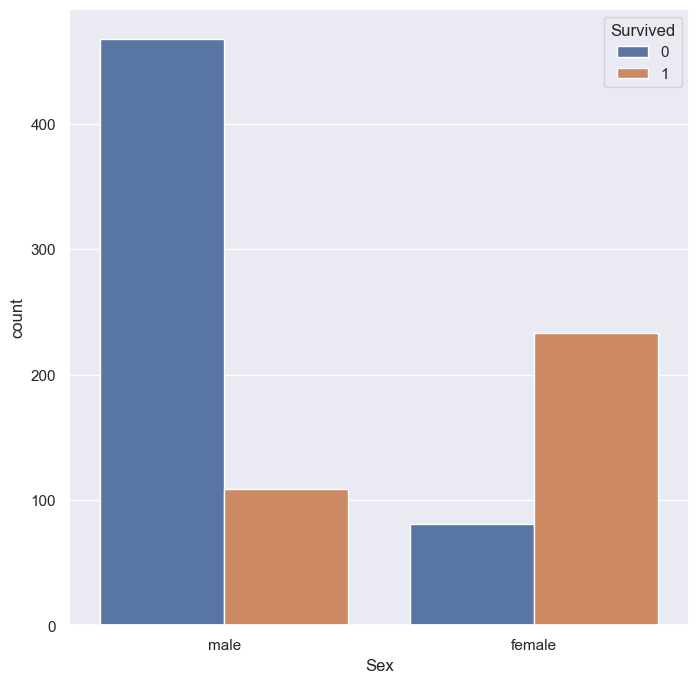

In [50]:
# No.of survivors - Gender wise
plt.figure(figsize=(8, 8))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.show()

In [32]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

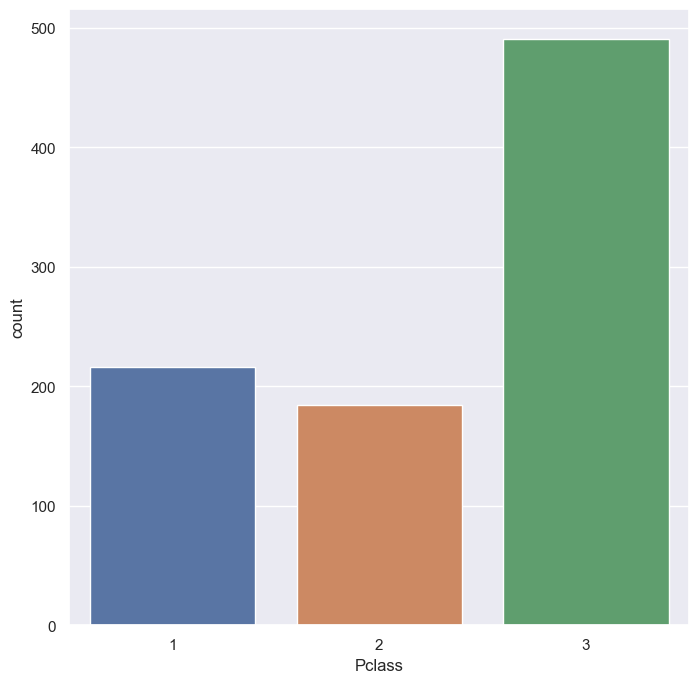

In [35]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Pclass', data=titanic_data)
plt.show()

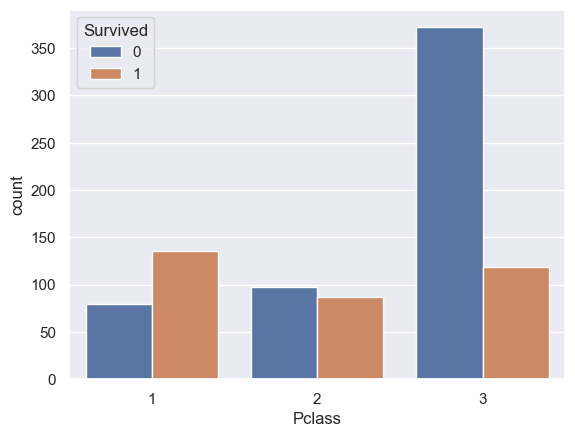

In [51]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.show()

In [36]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

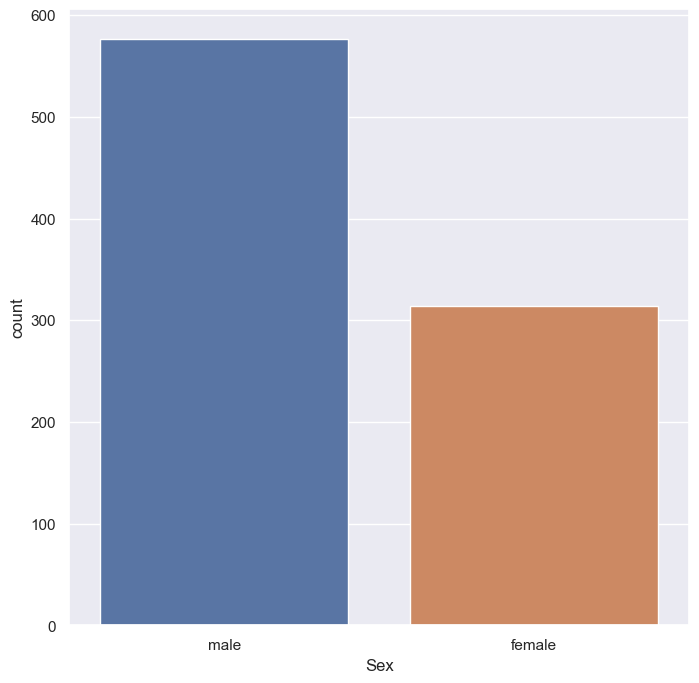

In [37]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Sex', data=titanic_data)
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


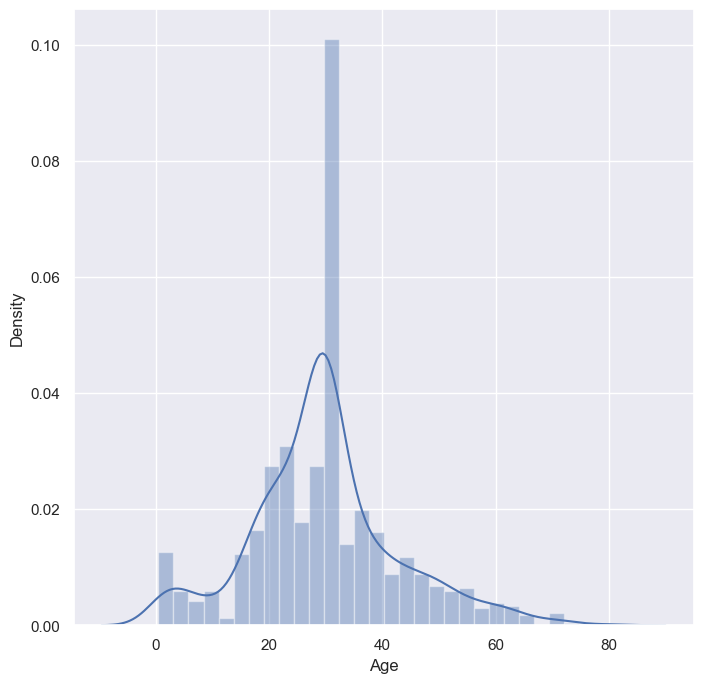

In [38]:
plt.figure(figsize=(8, 8))
sns.distplot(titanic_data['Age'])
plt.show()

In [39]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

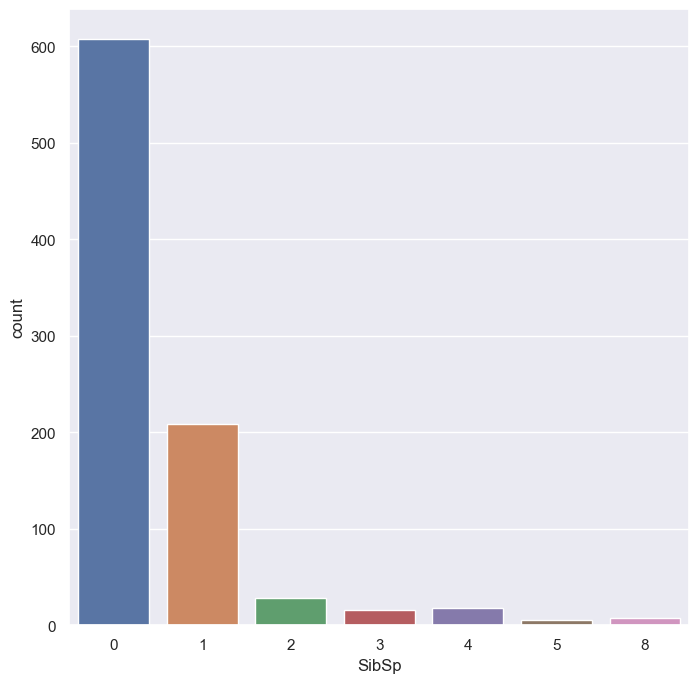

In [41]:
plt.figure(figsize=(8, 8))
sns.countplot(x='SibSp', data=titanic_data)
plt.show()

In [42]:
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

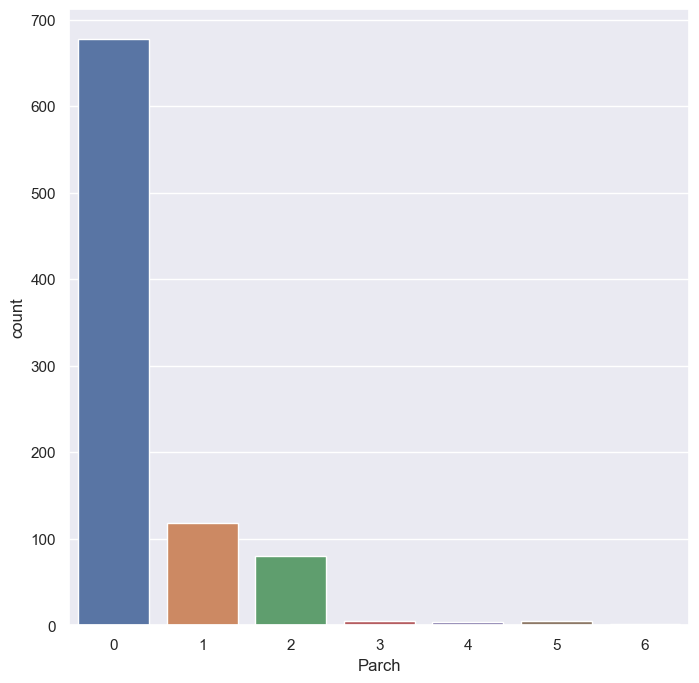

In [43]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Parch', data=titanic_data)
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


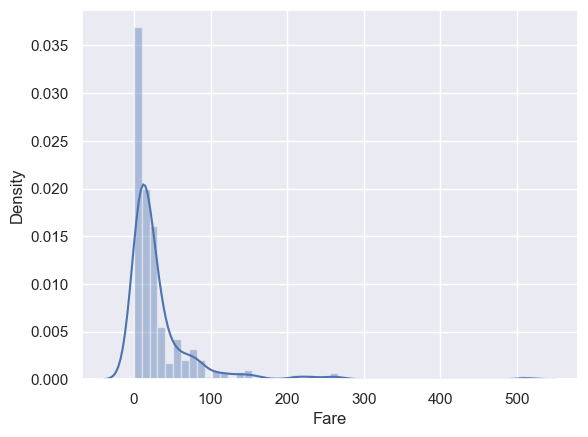

In [52]:
sns.distplot(titanic_data['Fare'])
plt.show()

### Encoding the categorical columns 'Sex' and 'Embarked'

In [53]:
titanic_data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

In [56]:
titanic_data.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [57]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Splitting the features and the label

In [58]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = titanic_data['Survived']

## Splitting the dataset into training set and test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Training the Logistic Regression Model

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

### Evaluation on Training Data

In [61]:
y_pred_train = model.predict(X_train)
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print(confusion_matrix(y_train, y_pred_train))

Accuracy score = 80.62%
[[375  64]
 [ 74 199]]


### Evaluation on Test Data

In [62]:
y_pred_test = model.predict(X_test)
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print(confusion_matrix(y_test, y_pred_test))

Accuracy score = 78.21%
[[95 15]
 [24 45]]


## Building a second model using undersampling

In [63]:
survival_positive = titanic_data[titanic_data['Survived'] == 1]
survival_negative = titanic_data[titanic_data['Survived'] == 0]

In [64]:
print(survival_positive.shape)
print(survival_negative.shape)

(342, 11)
(549, 11)


In [65]:
survival_negative_sample = survival_negative.sample(n=survival_positive.shape[0])

In [66]:
new_dataset = pd.concat([survival_positive, survival_negative_sample], axis=0)

In [67]:
new_dataset.shape

(684, 11)

In [68]:
new_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1


## Splitting the features and the label

In [70]:
X = new_dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = new_dataset['Survived']

## Splitting the dataset into training set and test set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Training the Logistic Regression Model

In [73]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

### Evaluation on the Training set

In [74]:
y_pred_train = model_2.predict(X_train)
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print(confusion_matrix(y_train, y_pred_train))

Accuracy score = 77.33%
[[215  58]
 [ 66 208]]


### Evaluation on the Test set

In [75]:
y_pred_test = model_2.predict(X_test)
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print(confusion_matrix(y_test, y_pred_test))

Accuracy score = 81.75%
[[60  9]
 [16 52]]


The second model performed reasonably well even with a smaller training set